In [ ]:
install.packages("ranger")
library(ranger)
install.packages("caret")
library(caret)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
creditcard_data <- read.csv("/creditcard.csv")
dim(creditcard_data)
head(creditcard_data,6)

[1] 3973   31

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [ ]:
tail(creditcard_data,10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3964,3600,-1.2087642,-0.09662505,1.8789169,-3.3895875,-0.76207075,-1.01386406,0.797772874,-0.53222870,3.6936867,⋯,0.015894600,0.74444339,-0.25863787,0.36371432,0.22862071,-1.07638045,-0.353820666,-6.639630e-02,109.89,0
3965,3606,-0.9391048,1.36474852,1.2811921,1.3444733,0.04346409,0.35240064,0.156646710,0.44824324,1.0531654,⋯,-0.191588382,0.10509157,-0.15425433,-0.04655834,-0.13590264,-0.29764363,0.225247070,-5.786864e-02,5.67,0
3966,3606,1.1323333,0.37579704,0.7958192,1.7828444,-0.46984255,-0.88827690,0.151506418,-0.32377997,1.4128357,⋯,-0.222050464,-0.19999112,-0.04358703,0.88916369,0.66214256,-0.41864451,-0.001088845,2.387198e-02,29.90,0
3967,3609,-0.3957490,1.00824777,1.2820355,0.5262213,0.86024136,0.31711808,0.614105097,0.14811734,0.3406205,⋯,0.003495307,0.27493337,-0.17092227,-0.34800939,0.08996861,-0.39502993,0.029507654,1.428694e-05,3.55,0
3968,3610,0.8169694,-0.28017500,1.3540641,2.8595477,-0.79225511,0.72378162,-0.662956645,0.29886568,1.3724792,⋯,-0.133301627,-0.43318129,-0.11109479,-0.10865143,0.18154888,-0.08937378,-0.026459700,3.863517e-02,150.91,0
3969,3617,1.1345915,0.25205121,0.4885924,0.7998261,-0.26481918,-0.36991754,-0.243364807,0.04976092,1.2108181,⋯,-0.351115149,-0.85146306,0.18616906,0.09246267,0.02001528,0.05797592,-0.046611372,1.256204e-02,13.99,0
3970,3621,-1.3386706,1.08097407,1.2911958,0.7192576,0.10132026,0.05389563,0.001297193,-0.91757504,1.6385099,⋯,0.498029644,-0.48393184,0.03768646,0.05356612,-0.56007825,0.23042321,-0.119911370,3.218467e-01,27.43,0
3971,3622,-0.3397280,-2.41744933,0.9755172,2.5379945,-1.72036121,0.86300468,0.032965247,0.02676418,2.4871387,⋯,0.391639390,0.26443209,-0.73503149,0.45059365,0.31002228,-0.23135724,-0.049872092,1.535264e-01,730.32,0
3972,3623,-0.3686387,0.94743234,1.7077549,0.9320920,0.29295639,0.18910044,0.499330119,0.13246617,0.7794120,⋯,-0.119044793,0.05666486,-0.17270305,0.17007257,0.13960480,-0.42051781,0.033794283,5.995619e-03,6.87,0


In [ ]:
table(creditcard_data$Class)


    0     1 
51440   150 

In [ ]:
summary(creditcard_data$Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    0.00     7.68    25.34    94.01    86.16 12910.93        1 

In [ ]:
names(creditcard_data)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [ ]:
var(creditcard_data$Amount)

[1] NA

In [ ]:
sd(creditcard_data$Amount)

[1] NA

In [ ]:
head(creditcard_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [ ]:
creditcard_data$Amount=scale(creditcard_data$Amount)
NewData=creditcard_data[,-c(1)]
head(NewData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<int>
1,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.25148014,0
2,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.34488283,0
3,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.18111312,0
4,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.14546366,0
5,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,-0.07172399,0
6,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,-0.34090518,0


In [ ]:
install.packages("caTools")
library(caTools)
set.seed(123)
data_sample = sample.split(NewData$Class,SplitRatio=0.80)
train_data = subset(NewData,data_sample==TRUE)
test_data = subset(NewData,data_sample==FALSE)
dim(train_data)
dim(test_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




ERROR: Error in eval(expr, envir, enclos): object 'NewData' not found


In [ ]:
Logistic_Model=glm(Class~.,test_data,family=binomial())
summary(Logistic_Model)

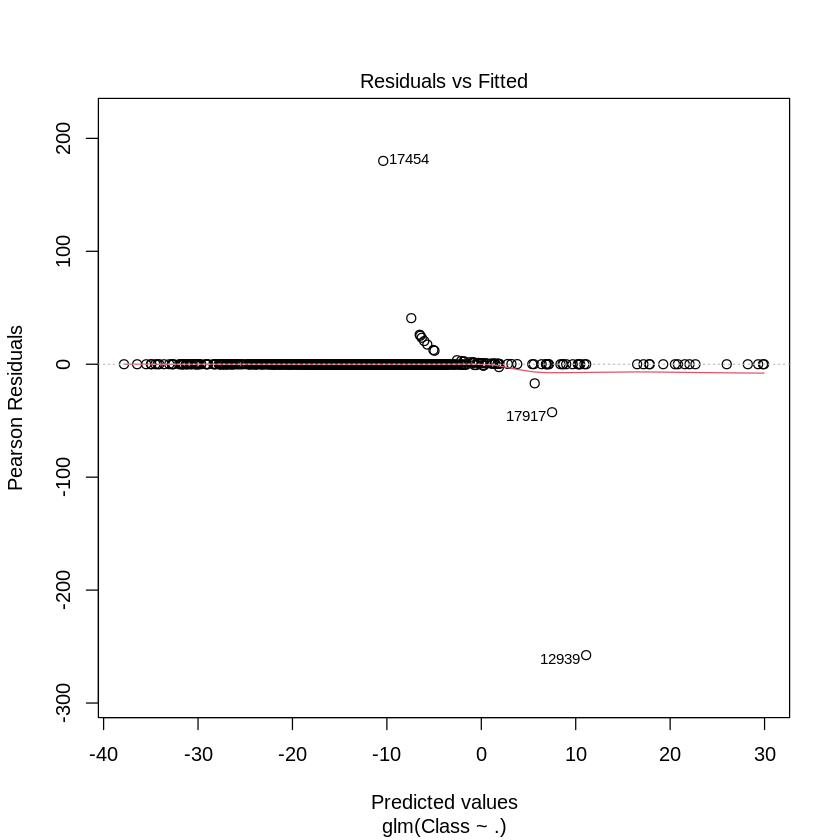

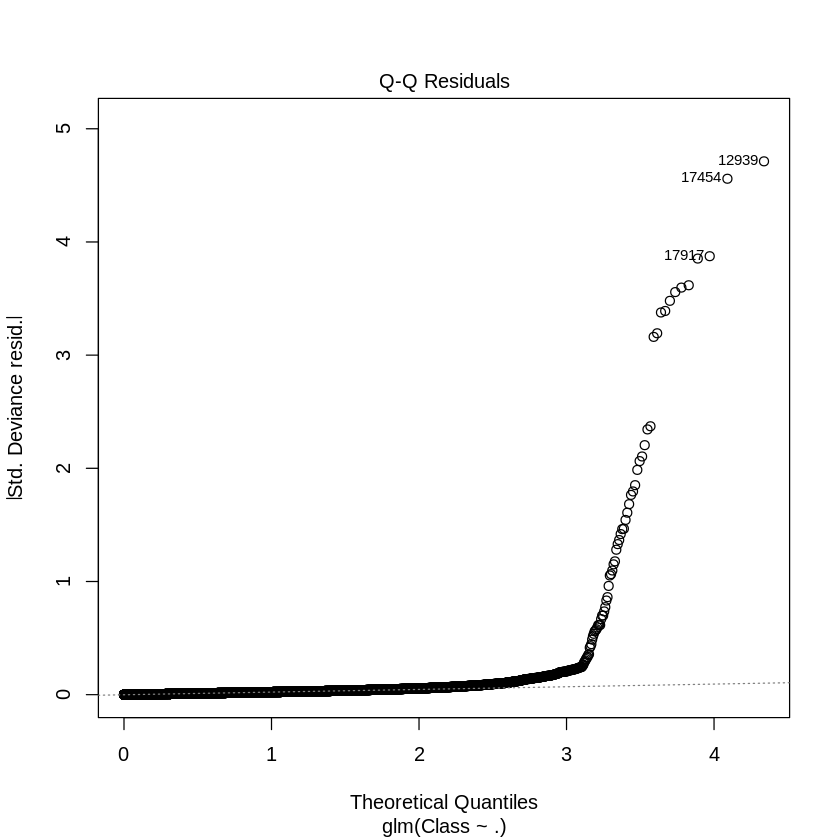

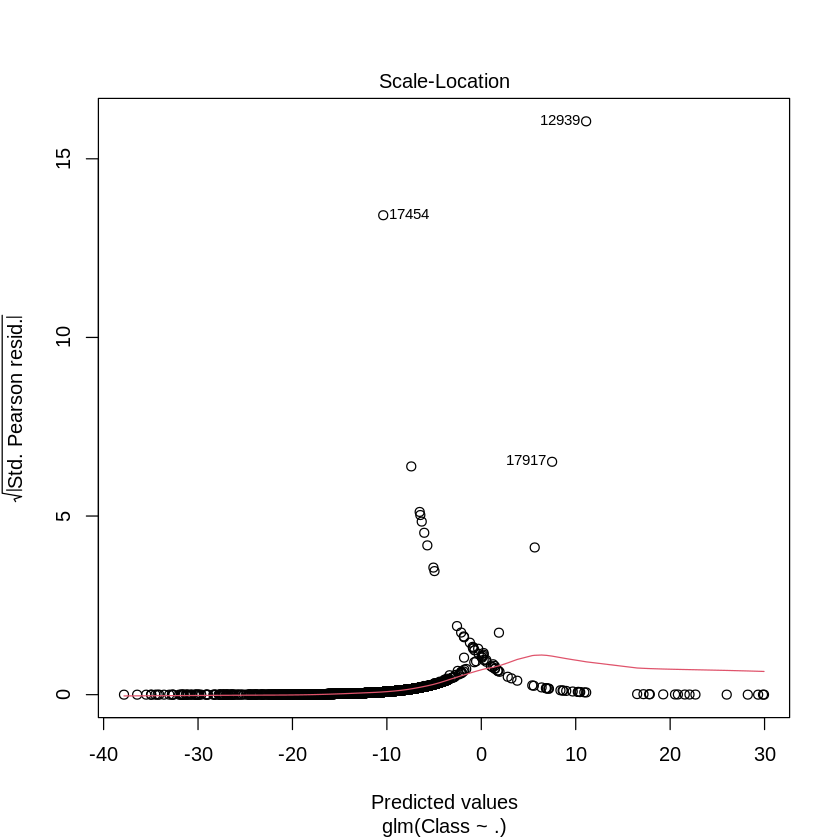

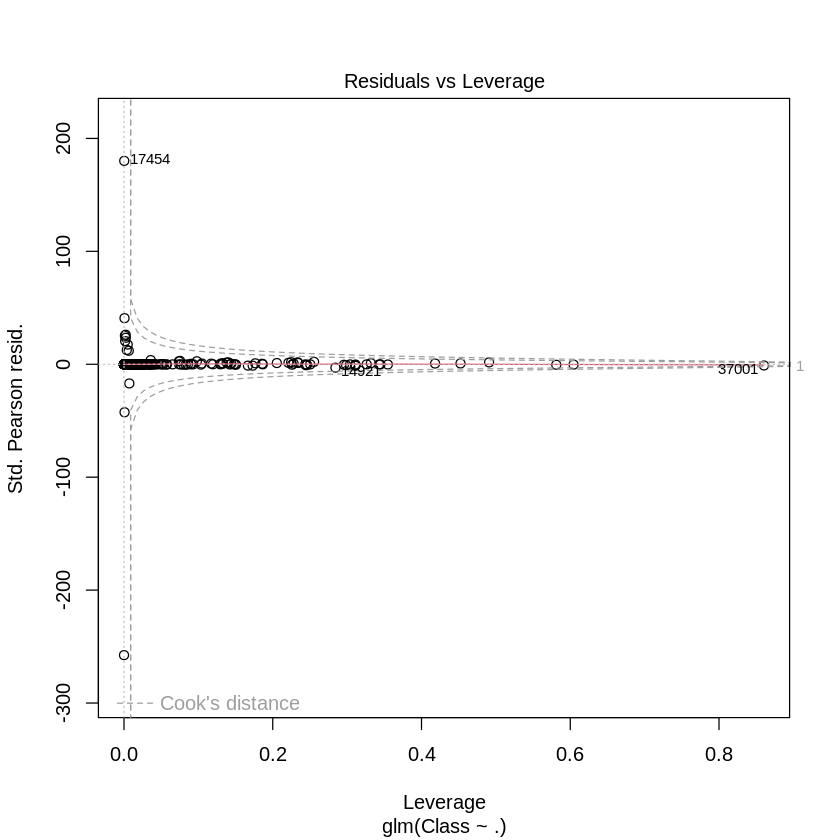

In [ ]:
plot(Logistic_Model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



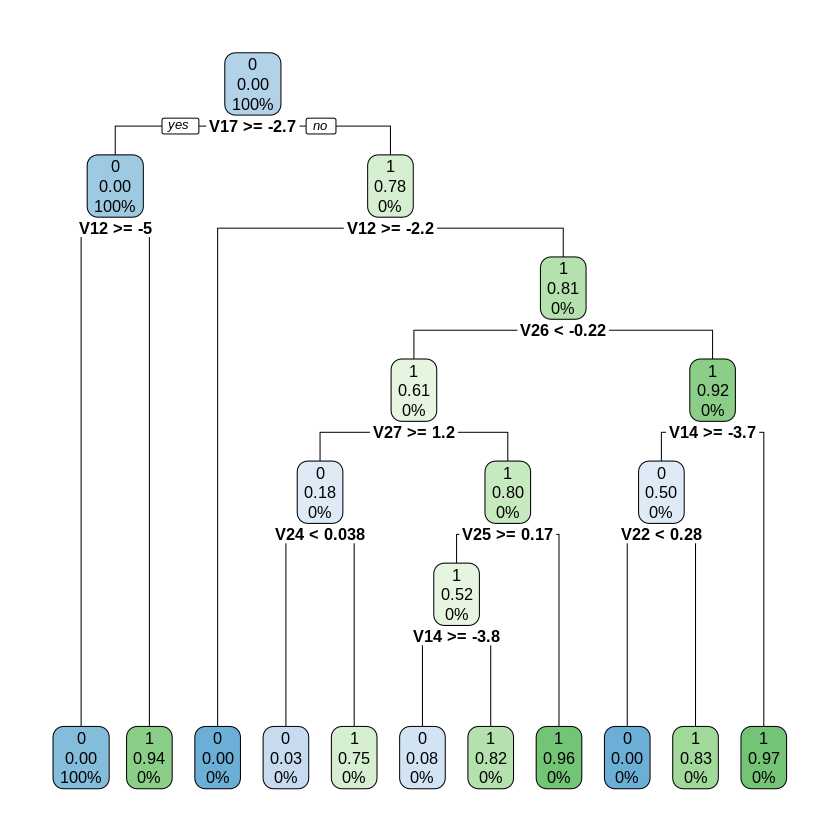

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)
decisionTree_model <- rpart(Class ~ . , creditcard_data, method = 'class')
predicted_val <- predict(decisionTree_model, creditcard_data, type = 'class')
probability <- predict(decisionTree_model, creditcard_data, type = 'prob')
rpart.plot(decisionTree_model)

In [ ]:
install.packages("neuralnet")
library(neuralnet)
ANN_model =neuralnet (Class~.,train_data,linear.output=FALSE)
plot(ANN_model)
predANN=compute(ANN_model,test_data)
resultANN=predANN$net.result
resultANN=ifelse(resultANN>0.5,1,0)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
ANN_model =neuralnet (Class~.,train_data,linear.output=FALSE)
plot(ANN_model)
predANN=compute(ANN_model,test_data)
resultANN=predANN$net.result
resultANN=ifelse(resultANN>0.5,1,0)

In [ ]:
plot(ANN_model)

In [ ]:
install.packages("gbm")
library(gbm, quietly=TRUE)
system.time(
       model_gbm <- gbm(Class ~ .
               , distribution = "bernoulli"
               , data = rbind(train_data, test_data)
               , n.trees = 500
               , interaction.depth = 3
               , n.minobsinnode = 100
               , shrinkage = 0.01
               , bag.fraction = 0.5
               , train.fraction = nrow(train_data) / (nrow(train_data) + nrow(test_data))
)
)
gbm.iter = gbm.perf(model_gbm, method = "test")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.1.9

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



ERROR: Error in checkMissing(x, y): Missing values are not allowed in the response


Timing stopped at: 0.231 0.037 0.268



In [ ]:
# Check for missing values in your 'Class' variable in both train_data and test_data
print(sum(is.na(train_data$Class)))
print(sum(is.na(test_data$Class)))

# If missing values are found, you have a couple of options:

# 1. Remove rows with missing values (if the number of such rows is small)
train_data <- train_data[!is.na(train_data$Class), ]
test_data <- test_data[!is.na(test_data$Class), ]

# 2. Impute missing values with a suitable method (mean, median, mode, etc.)
# Example using mean imputation (replace with a method appropriate for your data)
train_data$Class[is.na(train_data$Class)] <- mean(train_data$Class, na.rm = TRUE)
test_data$Class[is.na(test_data$Class)] <- mean(test_data$Class, na.rm = TRUE)

# After handling missing values, rerun your gbm model training:
system.time(
       model_gbm <- gbm(Class ~ .
               , distribution = "bernoulli"
               , data = rbind(train_data, test_data)
               , n.trees = 500
               , interaction.depth = 3
               , n.minobsinnode = 100
               , shrinkage = 0.01
               , bag.fraction = 0.5
               , train.fraction = nrow(train_data) / (nrow(train_data) + nrow(test_data))
)
)

[1] 0
[1] 1


   user  system elapsed 
154.772   0.154 155.608 

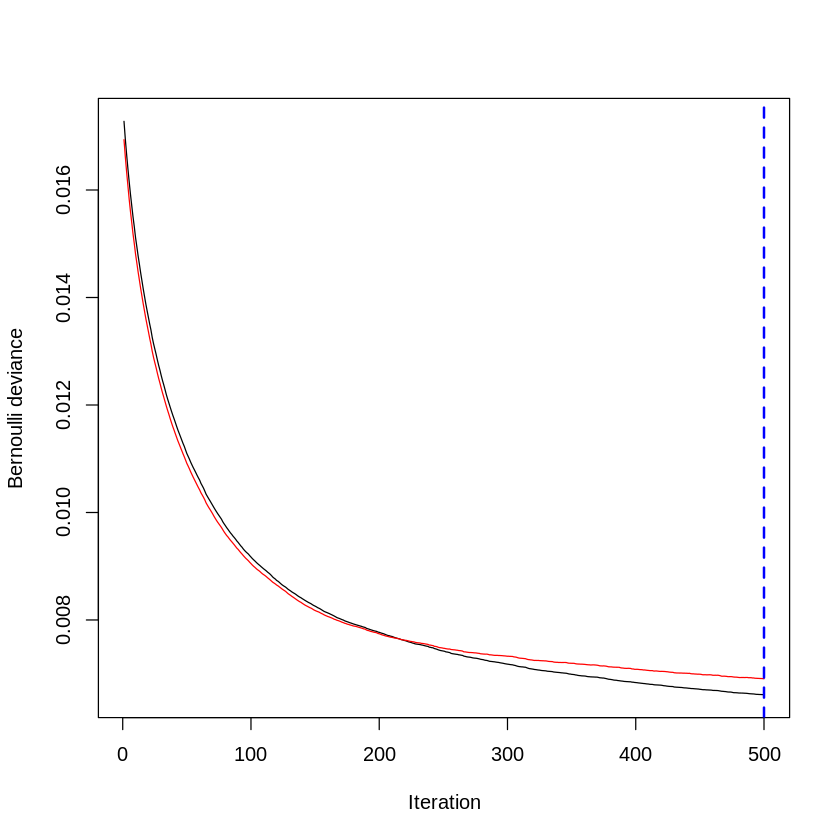

In [ ]:
gbm.iter = gbm.perf(model_gbm, method = "test")

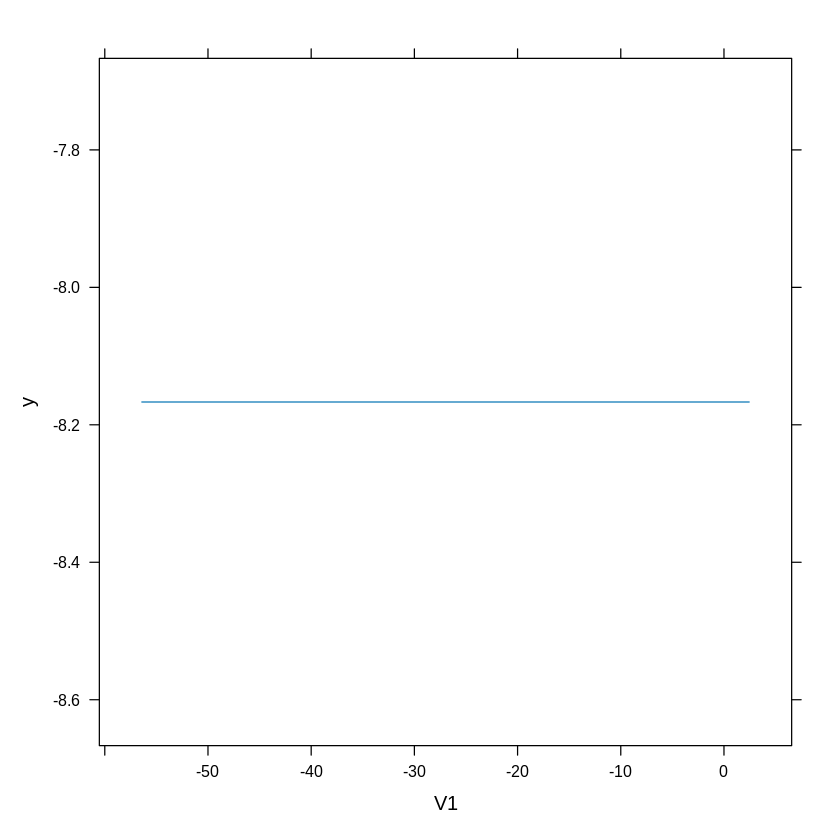

In [ ]:
model.influence = relative.influence(model_gbm, n.trees = gbm.iter, sort. = TRUE)
plot(model_gbm)

In [ ]:
install.packages("scikit-learn")
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘scikit-learn’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



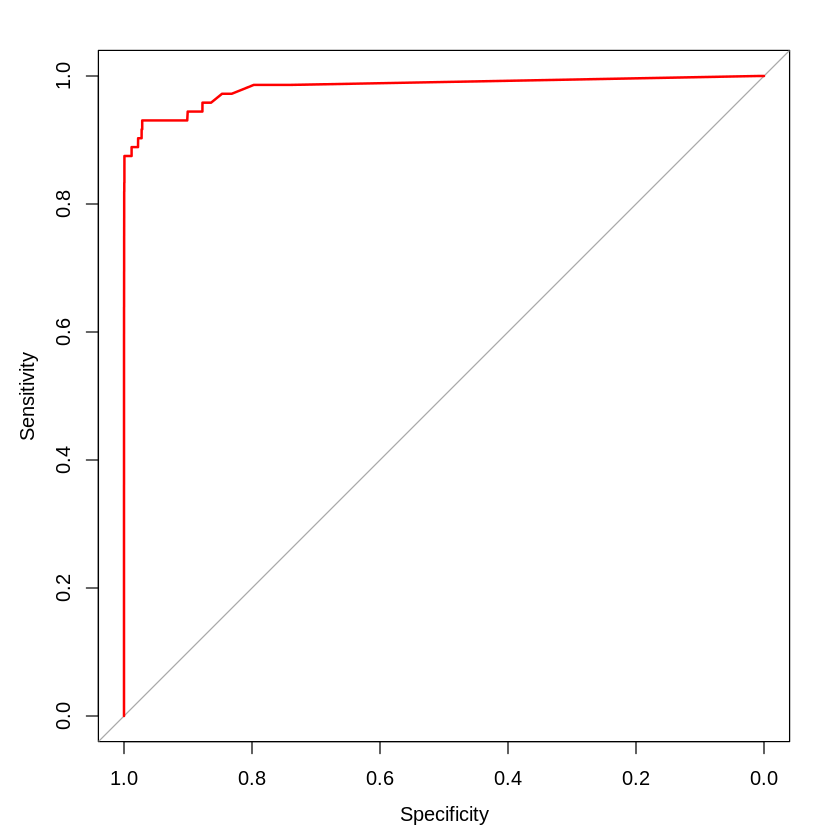

In [ ]:
gbm_test = predict(model_gbm, newdata = test_data, n.trees = gbm.iter)
gbm_auc = roc(test_data$Class, gbm_test, plot = TRUE, col = "red")

In [ ]:
print(gbm_auc)


Call:
roc.default(response = test_data$Class, predictor = gbm_test,     plot = TRUE, col = "red")

Data: gbm_test in 34811 controls (test_data$Class 0) < 72 cases (test_data$Class 1).
Area under the curve: 0.9823
